In [7]:
#必要なライブラリのインポート
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split # データを指定した比率でTrain/Testに分割してくれる関数
from sklearn.model_selection import GridSearchCV     # 指定したパラメータの組み合わせで、sklearn準拠のクラスで実装された機械学習モデルの網羅的な実験を行って結果をまとめてくれる機能が実装されたクラス
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                      # Pythonでデファクトスタンダードな可視化用ライブラリ
import seaborn as sns
import random

In [8]:
#乱数のシード値の設定
SEED=1000
random.seed(SEED)
np.random.seed(SEED)

In [9]:
boston=load_boston()
print(type(boston))
print(boston.feature_names)
print(boston.keys())
print(boston.data.dtype)


<class 'sklearn.utils.Bunch'>
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
float64


In [10]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [11]:
train_df=pd.DataFrame(boston.data, columns=boston.feature_names)
train_df.head(10)
train_df.info()
train_df.describe()
#print(boston.target)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


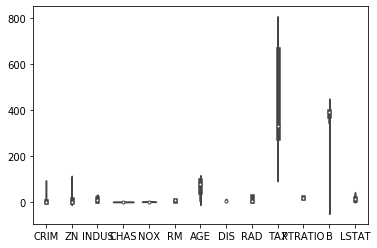

In [12]:
sns.violinplot(data=train_df)

In [ ]:
train_df['label']=[mylabel(x) for x in boston.target]
plt.plot(boston.target)
print(boston.target.max())
print(boston.target.min())

In [14]:
def mylabelx(data):
    result=int(data/5)
    if data%5==0:
        result-=1
    return result

In [15]:
def mylabel(data):
    return int((data-1)//5)

In [16]:
mylabel(50)

9

/Users/isonoyuma/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/isonoyuma/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

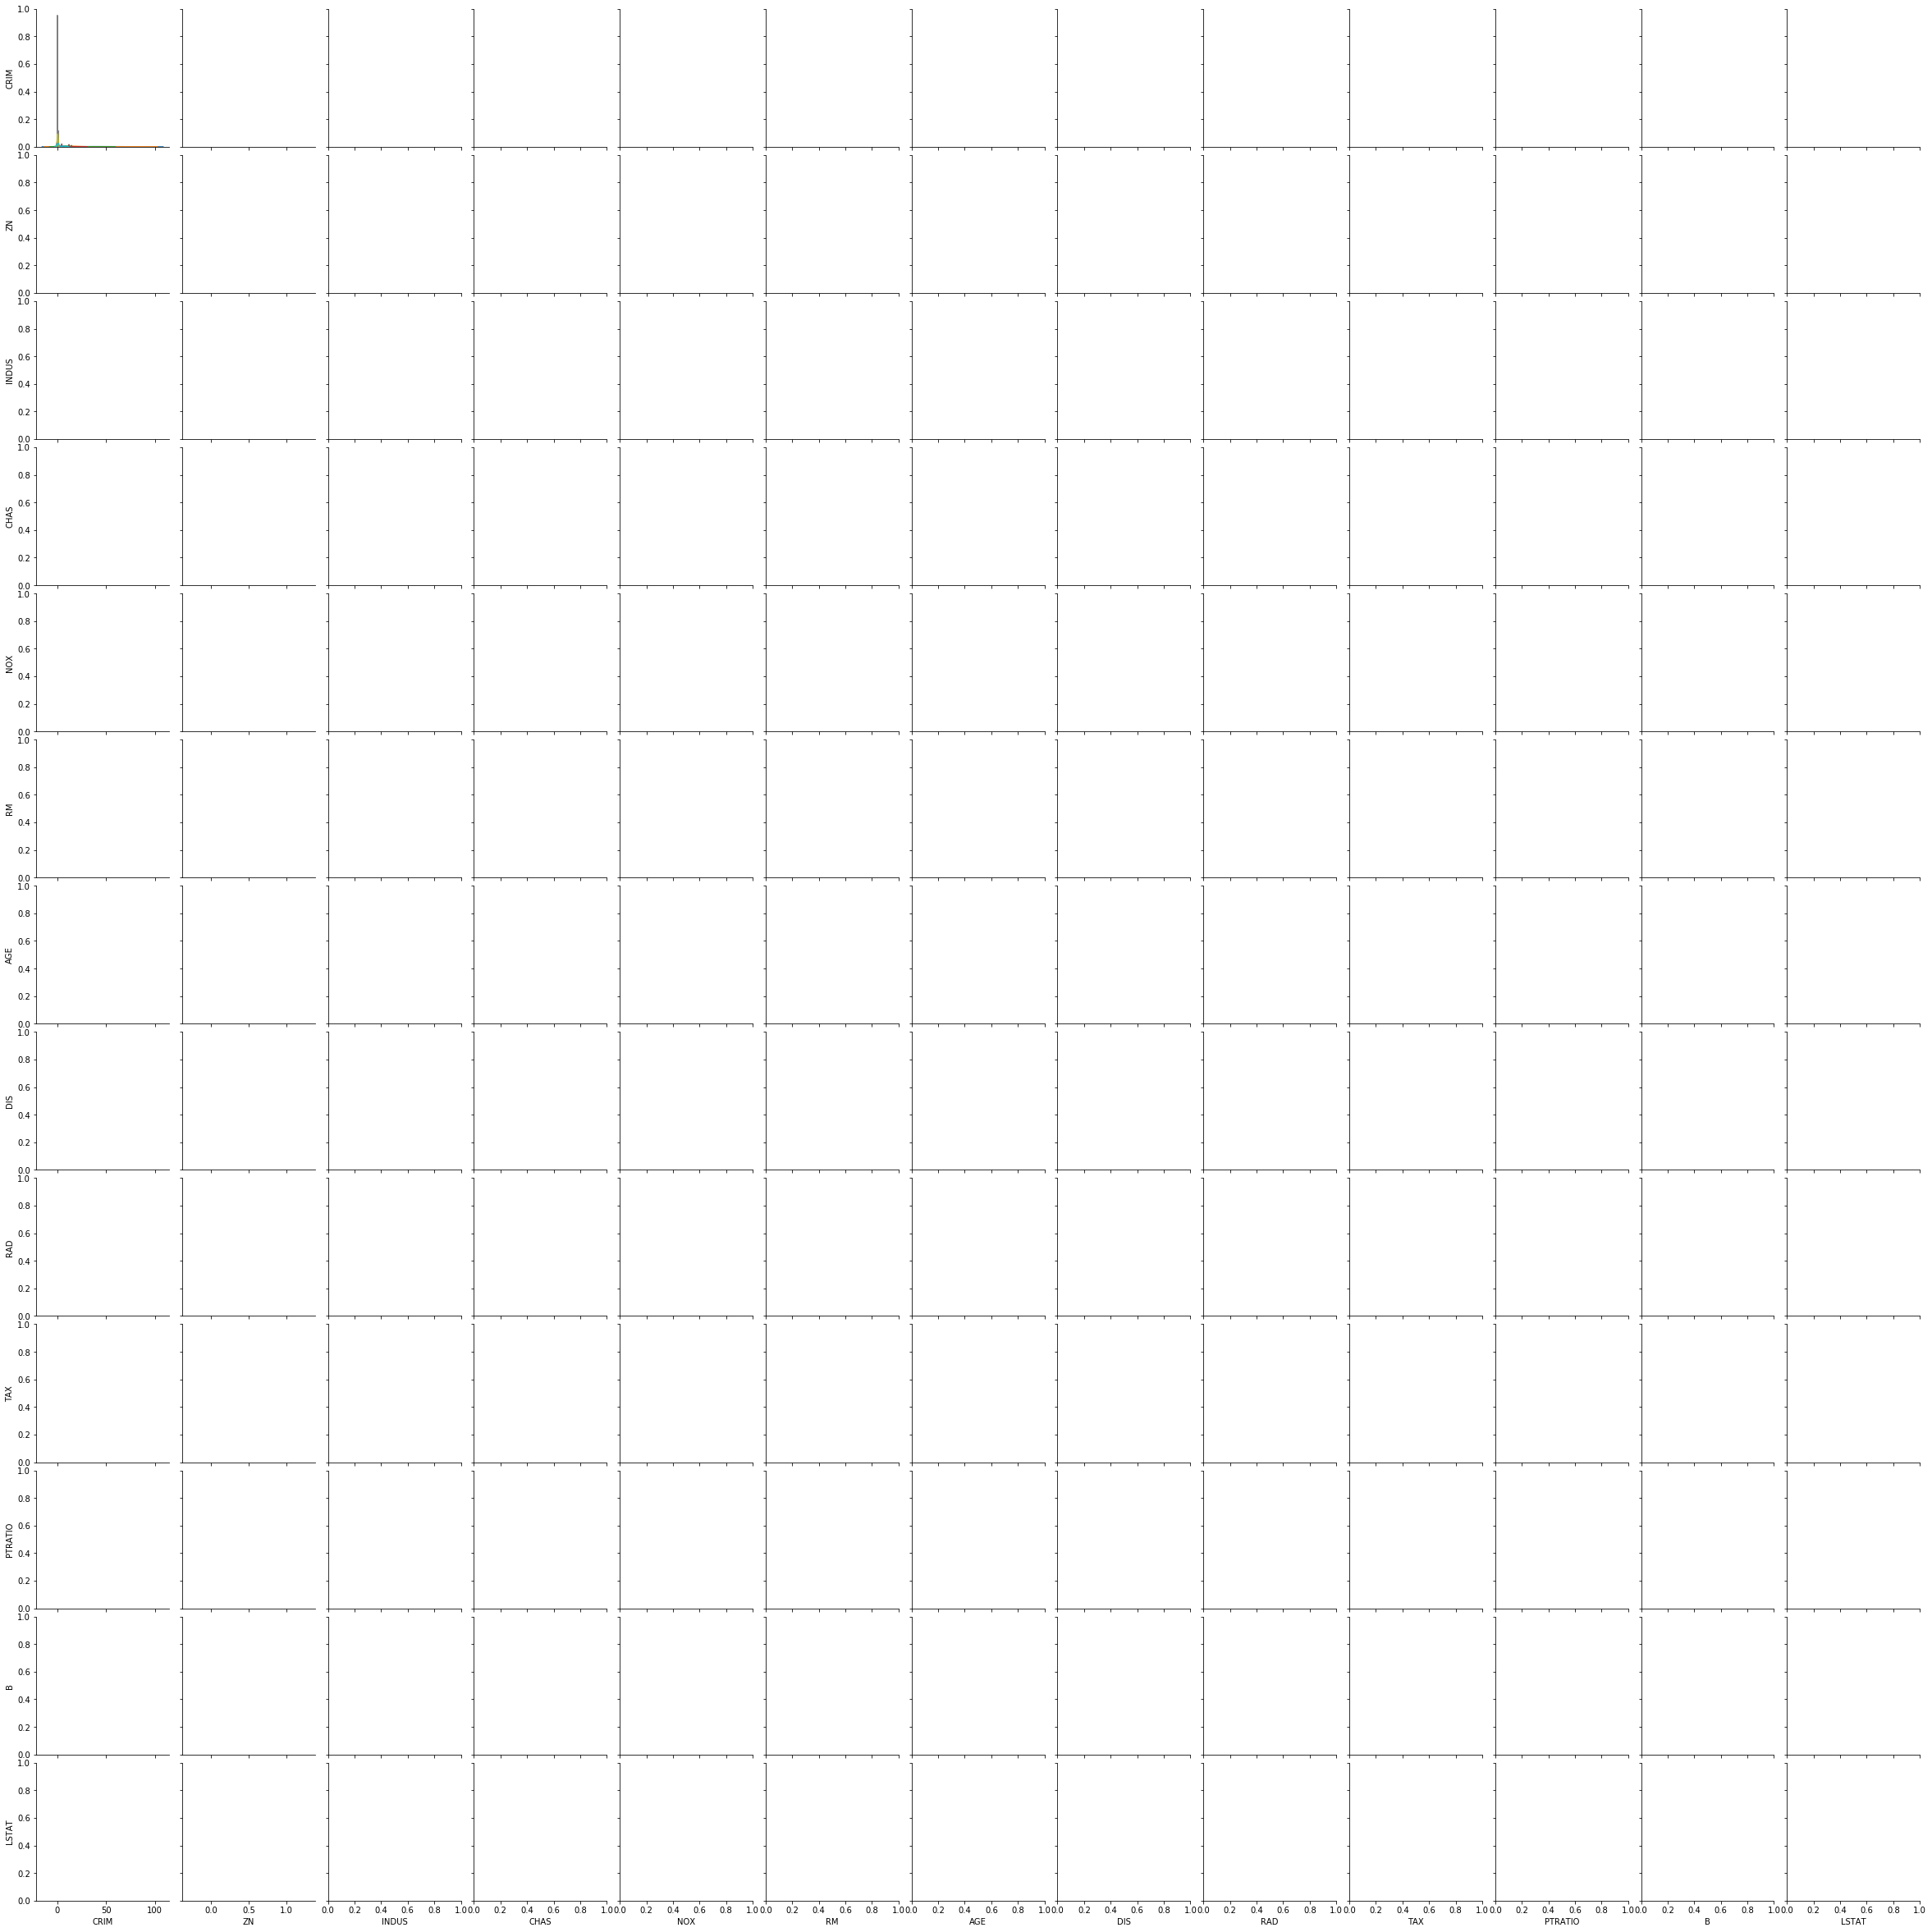

In [17]:
train_df['label']=[mylabel(x) for x in boston.target]

sns.pairplot(train_df,hue='label')

## EDAからの考察
- データの特性
- どんなpreprocessingをすべきか
    - 理由もつけて
    - できれば実装も
-作った10個のラベルを使って、KNNでtestsetのlabelをprediction
-testset = data[-100:]
-trainset = data[:-100]
-accもだしてね

## データセットの特徴の構成
- CRIM : 人口1人当たりの犯罪発生数
- ZN : 25000平方フィート以上の住居区画の占める割合
- INDUS : 小売業以外の商業が占める面積の割合
- CHAS : チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外)
- NOX : 二酸化窒素の濃度
- RM : 住居の平均部屋数
- AGE : 1940 年より前に建てられた物件の割合
- DIS : 5 つのボストン市の雇用施設からの距離 (重み付け済)
- RAD : 環状高速道路へのアクセスしやすさ
- TAX : $10,000 ドルあたりの不動産税率の総計
- PTRATIO : 町毎の児童と教師の比率
- B : 町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk – 0.63)^2
- LSTAT : 給与の低い職業に従事する人口の割合 (%)
